# Dataset Exploration for augmentation/other data manipulation

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from model.util import *
from imblearn.over_sampling import SMOTE, RandomOverSampler


In [15]:
# Import the dataset

dataset = pd.read_csv('data/horseData.csv')
dataset.head()

C:\Users\Brandon\AppData\Local\Temp\ipykernel_8760\3191596958.py:3: DtypeWarning: Columns (17,22) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('data/horseData.csv')


,name,form,rating,rawErg,erg,ems,grade,yob,sex,sire,...,ems3,grade4,bmSire,price,status,code,lot,vendor,purchaser,prev. price
0,America's Joy,UR,0,69,72,0,0,2018,F,American Pharoah,...,61,C1,Tricky Creek,8200000,Sold,KESEP,498.0,"Clarkland Farm, LLC","Whisper Hill Farm, Llc",NaN
1,Aussie Pride,W,86,80,71,0,0,2018,G,Curlin,...,57,C1,Lonhro,4100000,Sold,KESEP,274.0,"Eaton Sales, Agent for Stonestreet Bred & Raised",Godolphin,NaN
2,Lady Take Charge,UR,0,134,108,0,0,2015,F,War Front,...,68,C1,Dehere,3200000,Sold,KENOV,451.0,Eaton Sales,Whisper Hill Farm,NaN
3,Mendelssohn,G1w,101,73,73,0,0,2015,C,Scat Daddy,...,56,C1,Tricky Creek,3000000,Sold,KESEP,454.0,Clarkland Farm,M.V. Magnier,NaN
4,Serena's Harmony,UR,0,113,118,0,0,2014,F,Tapit,...,66,C1,Storm Cat,3000000,Sold,KENOV,402.0,Hill 'n' Dale Sales Agency,Bridlewood Farm,NaN


C:\Users\Brandon\AppData\Local\Temp\ipykernel_8760\2922128156.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=formCounts.index, y=formCounts.values, palette='viridis')


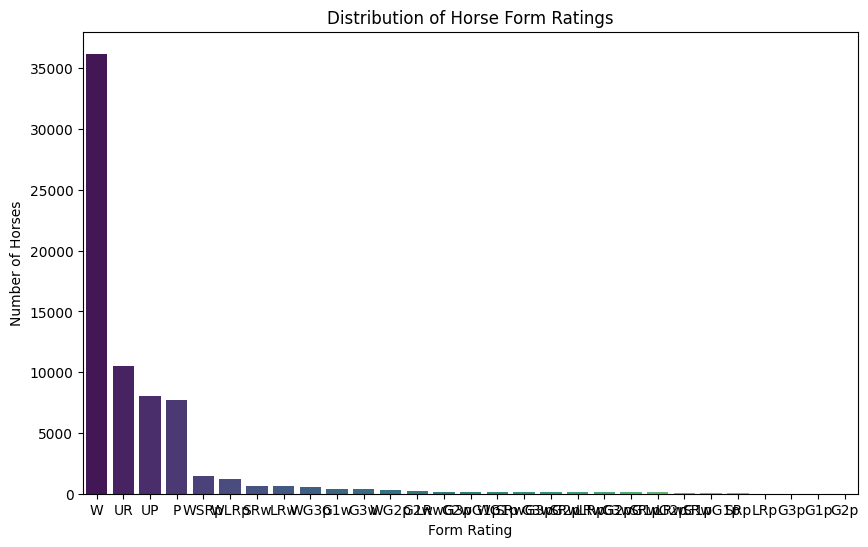

In [18]:
# Analayze form rating
formCounts = dataset['form'].value_counts()
formCounts

# Visualize form rating distribution
plt.figure(figsize=(10,6))
sns.barplot(x=formCounts.index, y=formCounts.values, palette='viridis')
plt.title('Distribution of Horse Form Ratings')
plt.xlabel('Form Rating')
plt.ylabel('Number of Horses')
plt.show()


In [33]:
# Usign SMOTE to balance dataset based on ratings

sm = SMOTE(random_state=42)
form = dataset['form']

X = mapFormToHierarchy(dataset['form'])
y = dataset['rating']

print(X.shape)
print(y)


#X_res, y_res = sm.fit_resample(X, y)

(69709,)
0          0
1         86
2          0
3        101
4          0
        ... 
69704      0
69705      0
69706      0
69707      0
69708      0
Name: rating, Length: 69709, dtype: int64
